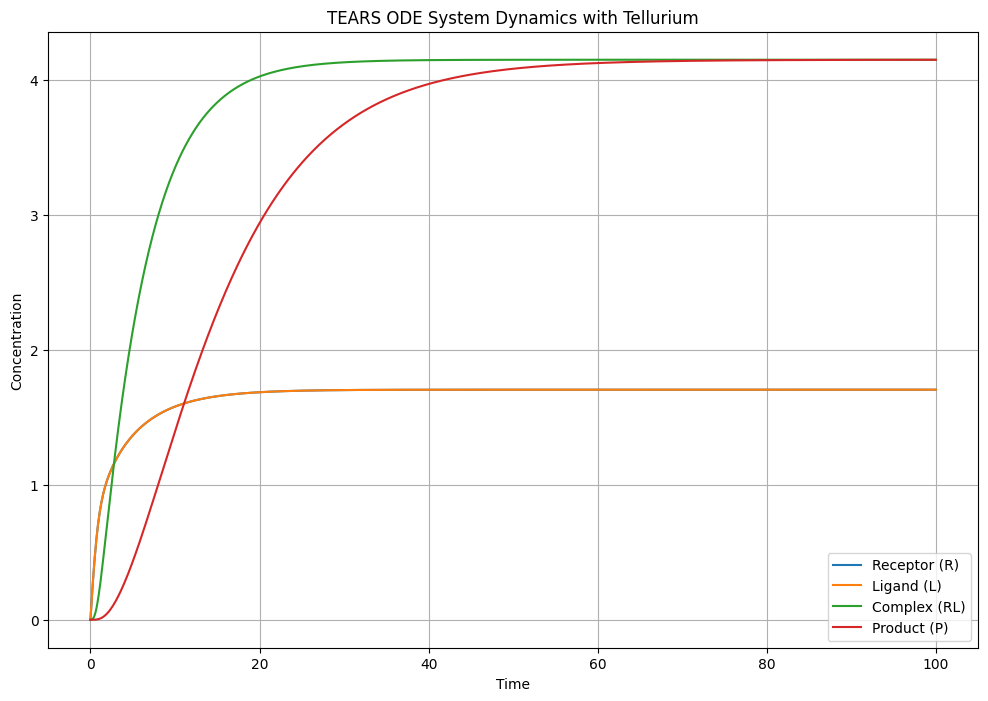

In [1]:
import tellurium as te
import matplotlib.pyplot as plt

# Define the model using Antimony syntax
model = '''
    model TEARS_Model
        # Parameters
        b_R = 1.0;  # Synthesis rate of receptors
        a_R = 0.1;  # Degradation rate of receptors
        b_L = 1.0;  # Synthesis rate of ligands
        a_L = 0.1;  # Degradation rate of ligands
        k = 1.0;    # Forward binding rate
        k_prime = 0.5; # Reverse binding rate
        kc = 0.1;   # Conversion rate from RL to P
        a_RL = 0.1; # Degradation rate of the complex RL
        a_P = 0.1;  # Degradation rate of product P

        # Reactions
        J0: -> R; b_R - a_R * R;
        J1: -> L; b_L - a_L * L;
        J2: R + L -> RL; k * R * L;
        J3: RL -> R + L; k_prime * RL;
        J4: RL -> P; kc * RL;
        J5: RL -> ; a_RL * RL;
        J6: P -> ; a_P * P;

        # Species initializations
        R = 0.0;
        L = 0.0;
        RL = 0.0;
        P = 0.0;
    end
'''

# Load the model
r = te.loada(model)

# Simulate the model over 100 time units
result = r.simulate(0, 100, 1000)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(result[:, 0], result[:, 1], label='Receptor (R)')
plt.plot(result[:, 0], result[:, 2], label='Ligand (L)')
plt.plot(result[:, 0], result[:, 3], label='Complex (RL)')
plt.plot(result[:, 0], result[:, 4], label='Product (P)')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('TEARS ODE System Dynamics with Tellurium')
plt.legend()
plt.grid()
plt.show()
